In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")



Mounted at /content/gdrive


In [ ]:
import os
import zipfile

zip_file_path = "/content/gdrive/My Drive/archive.zip"

extraction_dir = "/kaggle/input/fer2013/"

os.makedirs(extraction_dir, exist_ok=True)

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extraction_dir)

TRAINDIR = os.path.join(extraction_dir, "train")
VALDIR = os.path.join(extraction_dir, "test")
IMAGES = 20

classes_train = os.listdir(TRAINDIR)
classes_valid = os.listdir(VALDIR)

print(f'Train Classes - {classes_train}')
print(f'Validation Classes - {classes_valid}')

Train Classes - ['surprise', 'happy', 'neutral', 'sad', 'fear', 'disgust', 'angry']
Validation Classes - ['surprise', 'happy', 'neutral', 'sad', 'fear', 'disgust', 'angry']


In [ ]:
import os
import pandas as pd
from PIL import Image

dataset_dir = "/content/gdrive/MyDrive/dip data/new"

#  the labels (emotions) based on folder names
labels = os.listdir(os.path.join(dataset_dir, "train"))

emotion_list = []
pixels_list = []
usage_list = []

#  to read and convert an image to pixel values
def read_and_convert_image(image_path):
    img = Image.open(image_path)
    img = img.convert("L")  # Convert to grayscale
    img = img.resize((48, 48))  # Resize to a consistent size (adjust as needed)
    return " ".join(str(pixel) for pixel in img.getdata())

# Iterate through train and test folders
for usage in ["train", "test"]:
    for label in labels:
        label_dir = os.path.join(dataset_dir, usage, label)
        for image_file in os.listdir(label_dir):
            image_path = os.path.join(label_dir, image_file)

            # Read and convert the image to pixel values
            pixels = read_and_convert_image(image_path)

            # Append data to the lists
            emotion_list.append(labels.index(label))
            pixels_list.append(pixels)
            usage_list.append(usage)

# Create a DataFrame from the lists
data = {"emotion": emotion_list, "pixels": pixels_list, "Usage": usage_list}
df = pd.DataFrame(data)

csv_filename = "emotion_dataset.csv"
df.to_csv(csv_filename, index=False)
print(f"CSV file saved as {csv_filename}")


FileNotFoundError: ignored

This code reads images from a dataset directory, converts them to grayscale, resizes them, and stores the pixel values along with emotion labels and dataset usage information. It then saves this data as a CSV file for use in machine learning tasks. Essentially, it prepares image data for analysis and modeling.

In [ ]:
from google.colab import files
files.download('emotion_dataset.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
df

,emotion,pixels,Usage
0,0,243 141 96 84 79 98 106 107 43 118 168 134 91 ...,train
1,0,120 110 87 68 61 67 53 21 30 133 217 250 255 2...,train
2,0,40 39 44 50 52 48 51 61 53 53 46 49 81 100 145...,train
3,0,47 51 64 52 62 75 51 45 50 28 38 53 50 52 60 7...,train
4,0,40 43 42 42 41 44 41 43 42 40 38 26 19 49 41 3...,train
...,...,...,...
35882,6,41 42 34 32 20 13 13 17 23 36 31 41 51 43 41 4...,test
35883,6,107 114 121 125 125 120 114 110 116 92 38 34 5...,test
35884,6,41 45 40 40 39 37 63 82 97 111 117 107 102 96 ...,test
35885,6,238 237 235 240 238 245 241 229 222 215 212 21...,test


In [ ]:
import pandas as pd

df = pd.read_csv('/content/gdrive/MyDrive/csv data/emotion_dataset (2).csv')


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29915 entries, 0 to 29914
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   emotion  29915 non-null  int64 
 1   pixels   29915 non-null  object
 2   Usage    29915 non-null  object
dtypes: int64(1), object(2)
memory usage: 701.3+ KB


In [ ]:
emotion_label_to_text = {0:'anger', 1:'disgust', 2:'fear', 3:'happiness', 4: 'sadness', 5: 'surprise', 6: 'neutral'}

Assigning emotions for better understanding

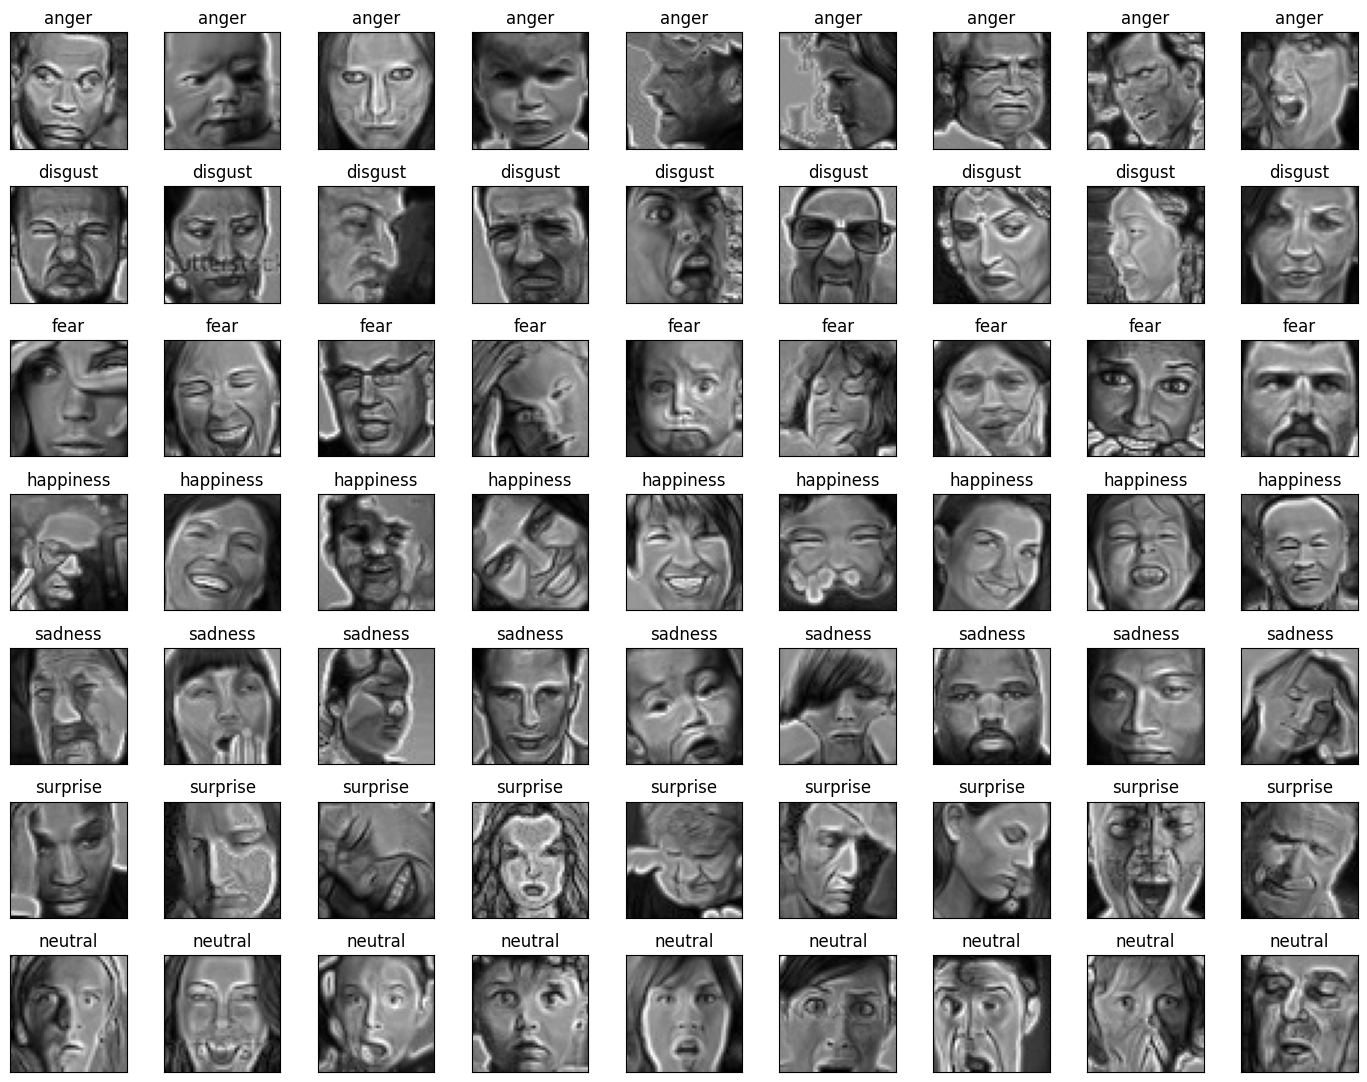

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure(1, (14, 14))

k = 0
for label in sorted(df.emotion.unique()):
    for j in range(9):
        px = df[df.emotion==label].pixels.iloc[k]
        px = np.array(px.split(' ')).reshape(48, 48).astype('float32')

        k += 1
        ax = plt.subplot(9, 9, k)
        ax.imshow(px, cmap='gray')
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_title(emotion_label_to_text[label])
        plt.tight_layout()

This code creates a 9x9 grid of grayscale images for different emotion labels. It iterates through emotion labels, extracts pixel data, and displays them in individual subplots. The code utilizes Matplotlib and NumPy to visualize and organize the images for better understanding of the dataset. It's a way to visually inspect and comprehend the emotions represented in the dataset.

In [ ]:
extraction_dir="/content/gdrive/MyDrive/dip data/new/"

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

batch_size  = 128
image_size=48
datagen_train  = ImageDataGenerator()
datagen_val = ImageDataGenerator()

train_set = datagen_train.flow_from_directory(extraction_dir+"train",
                                              target_size = (image_size,image_size),
                                              color_mode = "grayscale",
                                              batch_size=batch_size,
                                              class_mode='categorical',
                                              shuffle=True)


test_set = datagen_val.flow_from_directory(extraction_dir+"test",
                                              target_size = (image_size,image_size),
                                              color_mode = "grayscale",
                                              batch_size=batch_size,
                                              class_mode='categorical',
                                              shuffle=False)

Found 612 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [ ]:
train_set

In [ ]:
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.layers import Dense,Input,Dropout,GlobalAveragePooling2D,Flatten,Conv2D,BatchNormalization,Activation,MaxPooling2D

classes = 7

model = Sequential()

#1st CNN layer
model.add(Conv2D(64,(3,3),padding = 'same',input_shape = (48,48,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

In [ ]:
model.add(Conv2D(128,(5,5),padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout (0.25))

In [ ]:
model.add(Conv2D(512,(3,3),padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout (0.25))

In [ ]:
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

In [ ]:
model.add(Flatten())

In [ ]:
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

In [ ]:
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

In [ ]:
from tensorflow.keras.optimizers import Adam,SGD,RMSprop

model.add(Dense(classes, activation='softmax'))



opt = Adam(lr = 0.001)
model.compile(optimizer=opt,loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 64)        640       
                                                                 
 batch_normalization (Batch  (None, 48, 48, 64)        256       
 Normalization)                                                  
                                                                 
 activation (Activation)     (None, 48, 48, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 24, 24, 64)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 24, 24, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 128)       2

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

checkpoint = ModelCheckpoint("./model.h5", monitor='val_acc', verbose=1, save_best_only=True, mode='max')

early_stopping = EarlyStopping(monitor='val_loss',
                          min_delta=0,
                          patience=3,
                          verbose=1,
                          restore_best_weights=True
                          )

reduce_learningrate = ReduceLROnPlateau(monitor='val_loss',
                              factor=0.2,
                              patience=3,
                              verbose=1,
                              min_delta=0.0001)

callbacks_list = [early_stopping,checkpoint,reduce_learningrate]

epochs = 48

model.compile(loss='categorical_crossentropy',
              optimizer = Adam(lr=0.001),
              metrics=['accuracy'])

In [ ]:
history = model.fit_generator(generator=train_set,
                                steps_per_epoch=train_set.n//train_set.batch_size,
                                epochs=epochs,
                                validation_data = test_set,
                                validation_steps = test_set.n//test_set.batch_size,
                                callbacks=callbacks_list)

<ipython-input-24-9886a6645606>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(generator=train_set,


ValueError: ignored